In [6]:
# 결측치 만들기
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex': ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]})

df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [12]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [14]:
pd.isna(df) # pd.isna()를 이용하여 결측치 확인

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [16]:
# 결측치 있는 행 제거
# socre 결측치 제거
df.dropna(subset = 'score')

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [18]:
# 연산하면 NaN 없이 결과가 출력됨 
df_nomiss = df.dropna(subset = 'score')
df_nomiss['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [20]:
# 여러 변수에 결측치 없는 데이터 추출하기
df_nomiss = df.dropna(subset = ['score', 'sex']) # socre, sex 결측치 제거
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [22]:
# 결측치가  하나라도 있으면 제거
# dropna()에 아무 매개변수 없이 전달
df_nomiss2 = df.dropna()
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [24]:
# sum, mean 함수 사용하면 자동으로 결측치 제거됨
df.groupby('sex') \
    .agg(mean_score = ('score', 'mean'), 
         sum_score = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [26]:
# 평균 값으로 결측치 대체하기 
exam = pd.read_csv('exam.csv')
exam.loc[[2, 7, 14], ['math']] = np.nan # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [28]:
# math 평균값 구하기
exam['math'].mean()

55.23529411764706

In [30]:
exam['math'] = exam['math'].fillna(55) # math가 NaN이면 55로 대체
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [32]:
exam['math'].isna().sum() # 결측치 빈도 확인

0

In [38]:
# 혼자서 해보기 
mpg = pd.read_csv('mpg.csv')

# nan 할당하기
mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan

In [40]:
# drv와 hwy에 결측치 몇개 있는지 확인
mpg[['hwy', 'drv']].isna().sum()

hwy    5
drv    0
dtype: int64

In [44]:
# df.dropna()를 이용해 hwy 변수의ㅣ 결측치 제거
# 어떤 구동 방식의 (drv) 평균이 높은지 하나의 pandas 구문으로 
mpg.dropna(subset = 'hwy') \
    .groupby('drv') \
    .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


In [46]:
# 이상치가 들어있는 데이터 만들기
df = pd.DataFrame({'sex' : [1, 2, 1, 3, 2, 1],
                   'score' : [5,4, 3, 4, 2, 6]})

df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [48]:
# 이상치 확인하기
df['sex'].value_counts().sort_index()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [50]:
# 이상치 확인하기
df['score'].value_counts().sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

In [54]:
# 결측 처리하기 
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex']) # 3 값이면 nan으로 바꿈
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [58]:
# 결측 처리하기
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [62]:
# 결측치를 제거하고 분석
df.dropna(subset = ['sex', 'score']) \
    .groupby('sex') \
    .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [64]:
# np.where()의 결과롤 nan을 반환할 수 없음
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)

df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [66]:
df.isna() # 다 False로 출력됨 

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [68]:
# 결측치로 만들 문자 부여
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [70]:
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [72]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


<Axes: ylabel='hwy'>

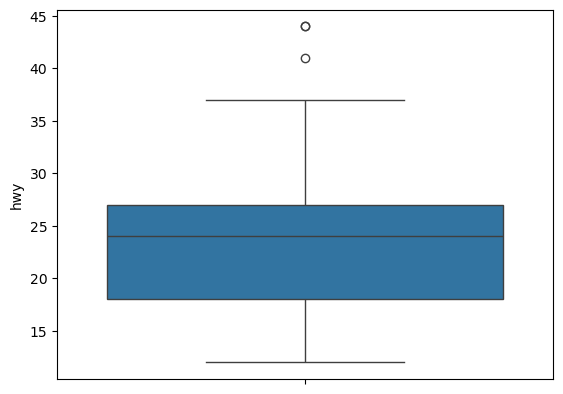

In [76]:
# 상자 그림 만들기
# 값을 크기 순으로 나열해 4등분 했을 때 위치하는 값인 '사분위수'를 이용해 만듦 
mpg = pd.read_csv('mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [78]:
# 하위 25%에 해당하는 분위수
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [80]:
# 하위 75%에 해당하는 분위수
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [82]:
iqr = pct75 - pct25
iqr

9.0

In [84]:
# 하한
pct25 - 1.5 * iqr

4.5

In [86]:
# 상한 
pct75 + 1.5 * iqr

40.5

In [88]:
# 극단치를 결측 처리하기 
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5 ) | (mpg['hwy'] > 40.5), 
                      np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

In [92]:
# 결측치 제거 
# drv 구동 방식에 따라 hwy 평균이 어떻게 다른가? 
mpg.dropna(subset = 'hwy') \
    .groupby('drv') \
    .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


In [118]:
# 혼자서 해보기
mpg = pd.read_csv('mpg.csv')

# drv 이상치 할당 
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'

# cty 이상치 할당 
mpg.loc[[28, 42, 128, 202], 'cty'] = [3,4, 39, 42]

In [132]:
# drv에 이상치가 있는지 확인
mpg['drv'] = np.where(~mpg['drv'].isin(['4', 'f', 'r']), np.nan, mpg['drv'])
mpg['drv'].isna().sum()

4

In [126]:
# cty에 이상치가 있는지 확인 

# 상자 그림 그리기 
# sns.boxplot(data = mpg, y = 'cty')

# 하위 25%에 해당하는 분위수
pct25 = mpg['cty'].quantile(.25)

# 하위 75%에 해당하는 분위수
pct75 = mpg['cty'].quantile(.75)

# IQR
iqr = pct75 - pct25

# 하한
up = pct25 - 1.5 * iqr
print(up)
# 상한 
down = pct75 + 1.5 * iqr
print(down)

6.5
26.5


In [128]:
# 극단치 결측 처리하기 
mpg['cty'] = np.where((mpg['cty'] < up ) | (mpg['cty'] > down), 
                      np.nan, mpg['cty'])

# 결측치 빈도 확인
print(mpg['cty'].isna().sum())

9


In [136]:
# 이상치를 제거한 다음 drv 별로 cty 평균이 어떻게 다른지 알아보기 
mpg.dropna(subset = ['drv', 'cty']) \
    .groupby('drv') \
    .agg(cty_mean = ('cty', 'mean'))

,cty_mean
drv,
4,14.247423
f,19.470000
r,13.958333
